In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_limpio.csv')
df = df.drop('customerID', axis=1)
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


**Se Carga el archivo** CSV previamente tratado (solo columnas relevantes y datos limpios) y leerlo con Pandas.
**Eliminar columnas irrelevantes** para el análisis y el modelado, como identificadores únicos (customerID).

In [35]:
# Identificar columnas con 'No internet service'
no_internet_cols = [col for col in df.columns if 'internet' in col and df[col].dtype == 'object' and 'No internet service' in df[col].unique()]

print("Columnas con 'No internet service':", no_internet_cols)

# Mapear 'No internet service' a 'No' en las columnas identificadas
for col in no_internet_cols:
    df[col] = df[col].replace('No internet service', 'No')

display(df[no_internet_cols].head())

Columnas con 'No internet service': ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']


,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies
0,No,Yes,No,Yes,Yes,No
1,No,No,No,No,No,Yes
2,No,No,Yes,No,No,No
3,No,Yes,Yes,No,Yes,Yes
4,No,No,No,Yes,Yes,No


In [36]:
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

Conteo de valores nulos por columna:
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [37]:
# Eliminar filas con valores nulos en las columnas especificadas
df.dropna(subset=['Total.Day', 'account.Charges.Total'], inplace=True)

# Verificar que los valores nulos hayan sido eliminados
print("Conteo de valores nulos después de eliminar filas:")
print(df.isnull().sum())

Conteo de valores nulos después de eliminar filas:
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
Total.Day                    0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [38]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas (excluyendo la variable objetivo si es numérica)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Excluir la columna 'Churn' si es numérica y no debe ser normalizada (es la variable objetivo)
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

print("Columnas numéricas a normalizar:", numeric_cols)

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la normalización a las columnas numéricas
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

display(df[numeric_cols].head())

Columnas numéricas a normalizar: ['customer.SeniorCitizen', 'customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total
0,-0.440327,-0.954296,0.039876,0.026652,-0.745607
1,-0.440327,-0.954296,-0.148964,-0.162819,-0.768063
2,-0.440327,-1.158016,0.179021,0.302548,-0.883456
3,2.271039,-0.791321,1.003951,1.103642,-0.461240
4,2.271039,-1.198760,0.805173,0.634952,-0.889390


Codificar las variables categóricas en formato numérico utilizando pd.get_dummies() o OneHotEncoder

In [39]:
# Identificar columnas categóricas (excluyendo la variable objetivo si es categórica)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Excluir la columna 'Churn' si es categórica (es la variable objetivo)
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("Columnas categóricas a codificar:", categorical_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True para evitar multicolinealidad

display(df_encoded.head())

Columnas categóricas a codificar: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


,Churn,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,No,-0.440327,-0.954296,0.039876,0.026652,-0.745607,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,No,-0.440327,-0.954296,-0.148964,-0.162819,-0.768063,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,Yes,-0.440327,-1.158016,0.179021,0.302548,-0.883456,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,Yes,2.271039,-0.791321,1.003951,1.103642,-0.461240,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,Yes,2.271039,-1.198760,0.805173,0.634952,-0.889390,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


Verificar la proporción de cancelación (Churn) con value_counts(normalize=True) para identificar si hay desbalance de clases.

In [40]:
# Verificar la proporción de cancelación (Churn)
print("Proporción de cancelación (Churn):")
print(df['Churn'].value_counts(normalize=True))

Proporción de cancelación (Churn):
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


Si existe desbalance de clases, aplicar técnicas de balanceo como SMOTE, undersampling o oversampling.

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separar características (X) y variable objetivo (y)
# Asignar la columna 'Churn' numérica (0 o 1) a la variable objetivo y
y = df_encoded['Churn']

# Eliminar la columna 'Churn' de las características X
X = df_encoded.drop('Churn', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba (usando 70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify=y para mantener la proporción de clases


print("Forma de X_train después de corregir error:", X_train.shape)
print("Forma de y_train después de corregir error:", y_train.shape)
print("Forma de X_test después de corregir error:", X_test.shape)
print("Forma de y_test después de corregir error:", y_test.shape)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nForma de X_train después de SMOTE (corregido):", X_train_res.shape)
print("Forma de y_train después de SMOTE (corregido):", y_train_res.shape)
print("Distribución de clases en y_train después de SMOTE (corregido):\n", y_train_res.value_counts())

Forma de X_train después de corregir error: (4922, 25)
Forma de y_train después de corregir error: (4922,)
Forma de X_test después de corregir error: (2110, 25)
Forma de y_test después de corregir error: (2110,)

Forma de X_train después de SMOTE (corregido): (7228, 25)
Forma de y_train después de SMOTE (corregido): (7228,)
Distribución de clases en y_train después de SMOTE (corregido):
 Churn
Yes    3614
No     3614
Name: count, dtype: int64


Evaluar la necesidad de normalización o estandarización dependiendo del modelo a usar (Logistic Regression, KNN, SVM requieren; Decision Tree, Random Forest no requieren).

Como ya hemos aplicado StandardScaler a las columnas numéricas, los datos están listos para ser utilizados con modelos que requieren características escaladas, como Regresión Logística, KNN o SVM. Si decides usar un modelo basado en árboles, la normalización previa no perjudicará el rendimiento, simplemente no era un requisito indispensable para esos modelos específicos.

Realizar un análisis de correlación visualizando una matriz de correlación para identificar relaciones entre variables y Churn.

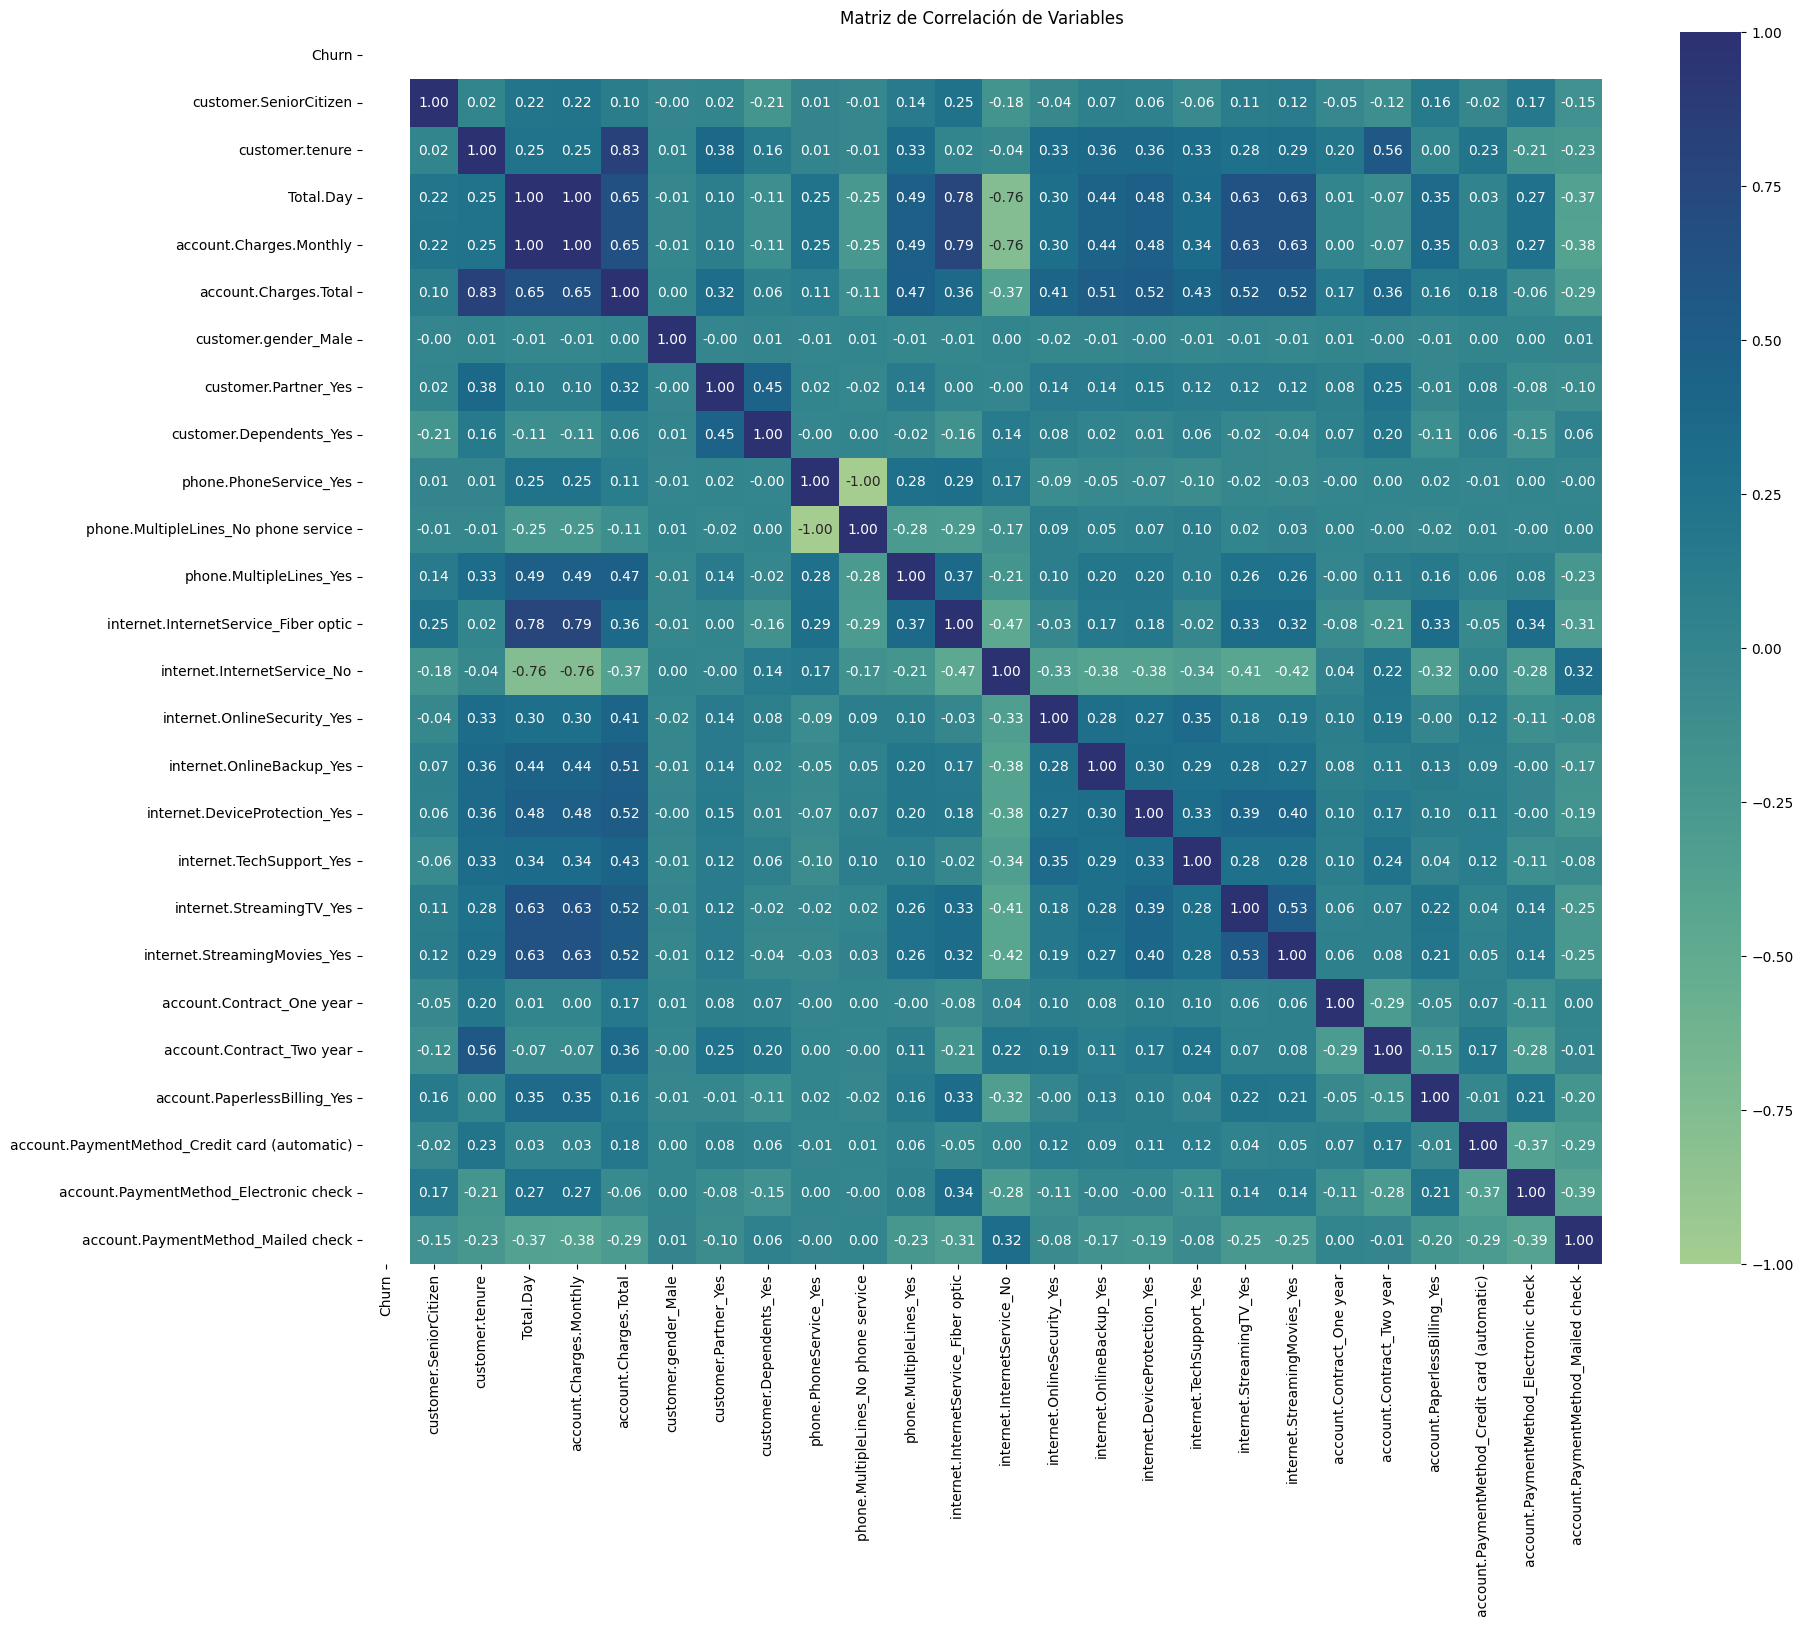


Correlación con 'Churn' (ordenada):
Churn                                           NaN
customer.SeniorCitizen                          NaN
customer.tenure                                 NaN
Total.Day                                       NaN
account.Charges.Monthly                         NaN
account.Charges.Total                           NaN
customer.gender_Male                            NaN
customer.Partner_Yes                            NaN
customer.Dependents_Yes                         NaN
phone.PhoneService_Yes                          NaN
phone.MultipleLines_No phone service            NaN
phone.MultipleLines_Yes                         NaN
internet.InternetService_Fiber optic            NaN
internet.InternetService_No                     NaN
internet.OnlineSecurity_Yes                     NaN
internet.OnlineBackup_Yes                       NaN
internet.DeviceProtection_Yes                   NaN
internet.TechSupport_Yes                        NaN
internet.StreamingTV_Yes   

In [66]:
# Calcular la matriz de correlación.
# Incluimos la variable objetivo 'Churn' en este análisis.
# Primero, necesitamos asegurarnos de que 'Churn' sea numérica para el cálculo de correlación.
# Ya la convertimos a numérica (0/1) para SMOTE, usaremos esa versión si está disponible,
# de lo contrario, la convertimos aquí.

# Asegurarse de que la columna 'Churn' en df_encoded es numérica (0 o 1)
# Convertir 'Yes' a 1 and 'No' a 0 in the 'Churn' column of the DataFrame df_encoded
df_encoded['Churn'] = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


# Calcular la matriz de correlación incluyendo la columna numérica de Churn
# No necesitamos crear una columna temporal 'Churn_numeric' si ya convertimos 'Churn' en el DataFrame.
correlation_matrix = df_encoded.corr(numeric_only=True)

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Matriz de Correlación de Variables')
plt.show()

# Opcional: Mostrar las correlaciones con 'Churn' ordenadas
print("\nCorrelación con 'Churn' (ordenada):")
print(correlation_matrix['Churn'].sort_values(ascending=False))

# No necesitamos eliminar una columna temporal de Churn si convertimos la original.
# df_encoded = df_encoded.drop('Churn_numeric', axis=1) # Eliminar esta línea

Se ha generado la matriz de correlación y mostrado las correlaciones con 'Churn'. Esto te da una idea de qué variables están más relacionadas con la deserción de clientes.

**Hacer un análisis dirigido de variables clave (ej. Tiempo de contrato vs. Cancelación, Gasto total vs. Cancelación) utilizando boxplots o scatter plots**

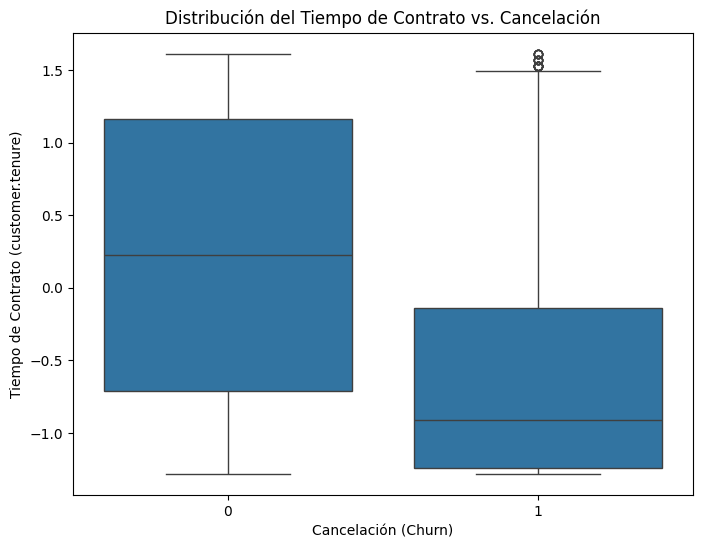

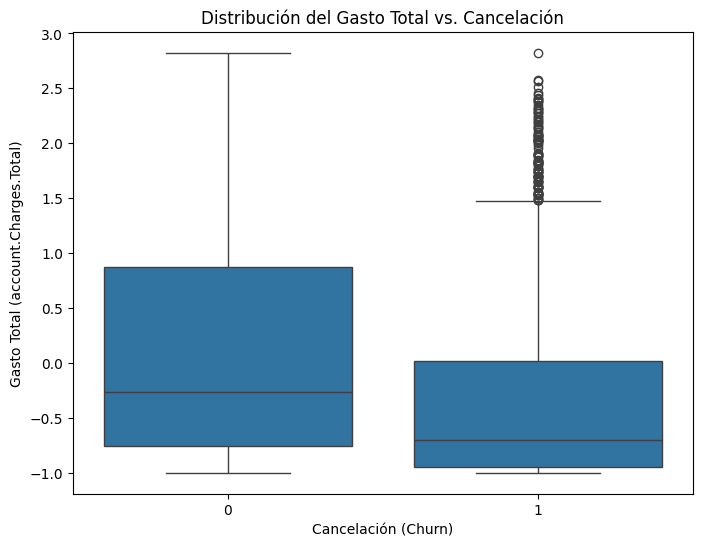

In [43]:
# Visualizar la relación entre 'customer.tenure' y 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_encoded)
plt.title('Distribución del Tiempo de Contrato vs. Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Tiempo de Contrato (customer.tenure)')
plt.show()

# Visualizar la relación entre 'account.Charges.Total' y 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_encoded)
plt.title('Distribución del Gasto Total vs. Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Gasto Total (account.Charges.Total)')
plt.show()

Separar los datos en conjuntos de entrenamiento y prueba (70/30 o 80/20) con train_test_split.

In [44]:
print("Distribución de clases en df_encoded['Churn'] antes de la división:")
print(df_encoded['Churn'].value_counts())
print("\nProporción de clases:")
print(df_encoded['Churn'].value_counts(normalize=True))

Distribución de clases en df_encoded['Churn'] antes de la división:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporción de clases:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm # Importar statsmodels.api como sm
import numpy as np # Importar numpy

# Convertir todo el DataFrame a tipo float para asegurar compatibilidad con statsmodels
X_train_res_numeric = X_train_res.astype(float)

# Calcular VIF para cada característica en X_train_res_numeric
# Es importante añadir una constante para el cálculo del VIF si el modelo a usar tiene intercepto
X_train_res_const = sm.add_constant(X_train_res_numeric)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_res_const.columns

# Asegurarse de que los valores sean finitos antes de calcular VIF
# Esto es una verificación adicional, aunque la conversión a float debería resolver el problema principal
if not np.isfinite(X_train_res_const.values).all():
    print("Error: El DataFrame contiene valores no finitos (inf o NaN) después de la conversión.")
else:
    vif_data["VIF"] = [variance_inflation_factor(X_train_res_const.values, i)
                       for i in range(X_train_res_const.shape[1])]

    print("Análisis de Multicolinealidad (VIF):")
    print(vif_data.sort_values(by="VIF", ascending=False))

Análisis de Multicolinealidad (VIF):
                                          feature          VIF
0                                           const  1608.847358
4                         account.Charges.Monthly   260.340268
10           phone.MultipleLines_No phone service   130.504308
9                          phone.PhoneService_Yes   129.418605
3                                       Total.Day   119.325644
12           internet.InternetService_Fiber optic    27.902104
13                    internet.InternetService_No    18.207184
5                           account.Charges.Total    10.729775
2                                 customer.tenure     8.876698
18                       internet.StreamingTV_Yes     5.425463
19                   internet.StreamingMovies_Yes     5.421391
21                      account.Contract_Two year     2.509844
11                        phone.MultipleLines_Yes     2.450468
24         account.PaymentMethod_Electronic check     2.277017
16                

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo de Regresión Logística
# Usaremos los datos de entrenamiento balanceados y escalados
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # solver='liblinear' es bueno para conjuntos de datos pequeños y medianos
log_reg_model.fit(X_train_res, y_train_res)

print("Modelo de Regresión Logística entrenado.")

# Inicializar y entrenar el modelo de Random Forest
# Usaremos los datos de entrenamiento balanceados (la normalización no afecta a RF, pero el balanceo sí es importante)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

print("Modelo de Random Forest entrenado.")

Modelo de Regresión Logística entrenado.
Modelo de Random Forest entrenado.


Modelo de Regresión Logística entrenado.
Modelo de Random Forest entrenado.

Evaluar el rendimiento de cada modelo utilizando métricas como exactitud, precisión, recall, F1-score y matriz de confusión.



--- Métricas de Re-Evaluación para Regresión Logística ---
Exactitud: 0.7611
Precisión: 0.5381
Recall: 0.7184
F1-Score: 0.6153
AUC-ROC: 0.8361739906949339

Matriz de Confusión:
[[1203  346]
 [ 158  403]]


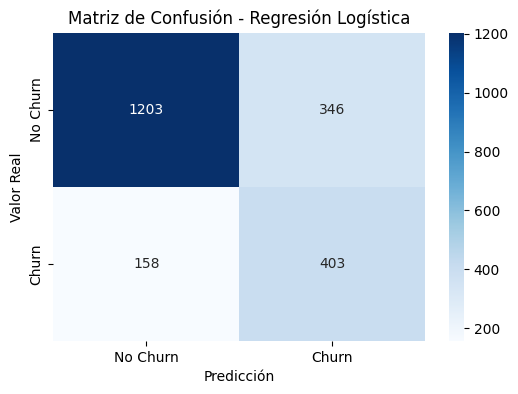


--- Métricas de Re-Evaluación para Random Forest ---
Exactitud: 0.7777
Precisión: 0.5732
Recall: 0.6417
F1-Score: 0.6056
AUC-ROC: 0.8192698641754959

Matriz de Confusión:
[[1281  268]
 [ 201  360]]


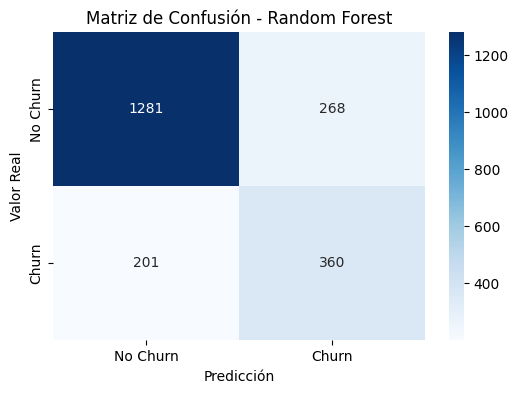

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-Evaluación del modelo de Regresión Logística ---

print("--- Métricas de Re-Evaluación para Regresión Logística ---")

# Convert y_test to numerical labels (0 and 1)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# Realizar predicciones en el conjunto de prueba (corregido sin fuga de datos)
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_log_reg_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred_log_reg]


# Calcular métricas de evaluación
accuracy_log_reg = accuracy_score(y_test_numeric, y_pred_log_reg_numeric)
precision_log_reg = precision_score(y_test_numeric, y_pred_log_reg_numeric)
recall_log_reg = recall_score(y_test_numeric, y_pred_log_reg_numeric)
f1_log_reg = f1_score(y_test_numeric, y_pred_log_reg_numeric)
conf_matrix_log_reg = confusion_matrix(y_test_numeric, y_pred_log_reg_numeric)
# Calcular AUC si las predicciones de probabilidad están disponibles
try:
    y_pred_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
    auc_log_reg = roc_auc_score(y_test_numeric, y_pred_prob_log_reg)
except AttributeError:
    auc_log_reg = "No disponible (el modelo no tiene predict_proba)"


print(f"Exactitud: {accuracy_log_reg:.4f}")
print(f"Precisión: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")
print(f"AUC-ROC: {auc_log_reg}")
print("\nMatriz de Confusión:")
print(conf_matrix_log_reg)

# Opcional: Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# --- Re-Evaluación del modelo de Random Forest ---

print("\n--- Métricas de Re-Evaluación para Random Forest ---")

# Realizar predicciones en el conjunto de prueba (corregido sin fuga de datos)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred_rf]

# Calcular métricas de evaluación
accuracy_rf = accuracy_score(y_test_numeric, y_pred_rf_numeric)
precision_rf = precision_score(y_test_numeric, y_pred_rf_numeric)
recall_rf = recall_score(y_test_numeric, y_pred_rf_numeric)
f1_rf = f1_score(y_test_numeric, y_pred_rf_numeric)
conf_matrix_rf = confusion_matrix(y_test_numeric, y_pred_rf_numeric)
# Calcular AUC si las predicciones de probabilidad están disponibles
try:
    y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
    auc_rf = roc_auc_score(y_test_numeric, y_pred_prob_rf)
except AttributeError:
    auc_rf = "No disponible (el modelo no tiene predict_proba)"


print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_rf}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)

# Opcional: Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [49]:
print("Columnas en X_train_res:")
print(X_train_res.columns)

print("\nColumnas en X_test:")
print(X_test.columns)

Columnas en X_train_res:
Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes',
       'internet.StreamingTV_Yes', 'internet.StreamingMovies_Yes',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

Columnas en X_test:
Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Cha

--- Métricas de Re-Evaluación para Regresión Logística ---
Exactitud: 0.7611
Precisión: 0.5381
Recall: 0.7184
F1-Score: 0.6153
AUC-ROC: 0.8361739906949339

Matriz de Confusión:
[[1203  346]
 [ 158  403]]


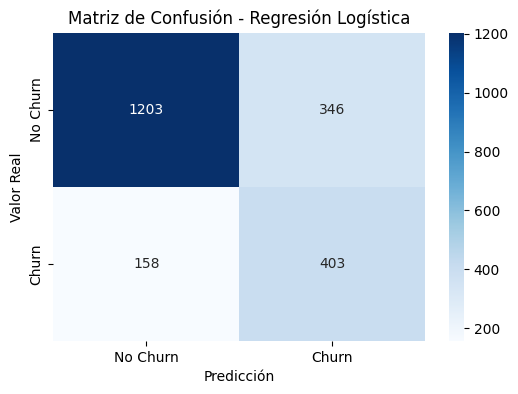


--- Métricas de Re-Evaluación para Random Forest ---
Exactitud: 0.7777
Precisión: 0.5732
Recall: 0.6417
F1-Score: 0.6056
AUC-ROC: 0.8192698641754959

Matriz de Confusión:
[[1281  268]
 [ 201  360]]


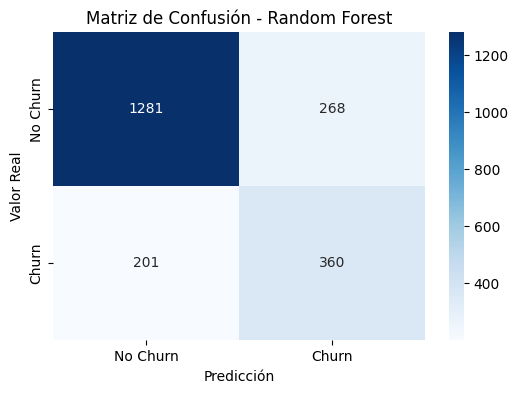

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-Evaluación del modelo de Regresión Logística ---

print("--- Métricas de Re-Evaluación para Regresión Logística ---")

# Convert y_test to numerical labels (0 and 1)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

# Realizar predicciones en el conjunto de prueba (corregido sin fuga de datos)
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_log_reg_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred_log_reg]


# Calcular métricas de evaluación
accuracy_log_reg = accuracy_score(y_test_numeric, y_pred_log_reg_numeric)
precision_log_reg = precision_score(y_test_numeric, y_pred_log_reg_numeric)
recall_log_reg = recall_score(y_test_numeric, y_pred_log_reg_numeric)
f1_log_reg = f1_score(y_test_numeric, y_pred_log_reg_numeric)
conf_matrix_log_reg = confusion_matrix(y_test_numeric, y_pred_log_reg_numeric)
# Calcular AUC si las predicciones de probabilidad están disponibles
try:
    y_pred_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
    auc_log_reg = roc_auc_score(y_test_numeric, y_pred_prob_log_reg)
except AttributeError:
    auc_log_reg = "No disponible (el modelo no tiene predict_proba)"


print(f"Exactitud: {accuracy_log_reg:.4f}")
print(f"Precisión: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")
print(f"AUC-ROC: {auc_log_reg}")
print("\nMatriz de Confusión:")
print(conf_matrix_log_reg)

# Opcional: Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# --- Re-Evaluación del modelo de Random Forest ---

print("\n--- Métricas de Re-Evaluación para Random Forest ---")

# Realizar predicciones en el conjunto de prueba (corregido sin fuga de datos)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred_rf]

# Calcular métricas de evaluación
accuracy_rf = accuracy_score(y_test_numeric, y_pred_rf_numeric)
precision_rf = precision_score(y_test_numeric, y_pred_rf_numeric)
recall_rf = recall_score(y_test_numeric, y_pred_rf_numeric)
f1_rf = f1_score(y_test_numeric, y_pred_rf_numeric)
conf_matrix_rf = confusion_matrix(y_test_numeric, y_pred_rf_numeric)
# Calcular AUC si las predicciones de probabilidad están disponibles
try:
    y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
    auc_rf = roc_auc_score(y_test_numeric, y_pred_prob_rf)
except AttributeError:
    auc_rf = "No disponible (el modelo no tiene predict_proba)"


print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC: {auc_rf}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)

# Opcional: Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# --- Evaluación del modelo de Regresión Logística en el conjunto de ENTRENAMIENTO ---

print("--- Métricas de Evaluación (ENTRENAMIENTO) para Regresión Logística ---")

# Convert y_train_res to numerical labels (0 and 1)
y_train_res_numeric = y_train_res.apply(lambda x: 1 if x == 'Yes' else 0)

# Realizar predicciones en el conjunto de entrenamiento
y_pred_log_reg_train = log_reg_model.predict(X_train_res)
y_pred_log_reg_train_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred_log_reg_train]

# Calcular métricas de evaluación en entrenamiento
accuracy_log_reg_train = accuracy_score(y_train_res_numeric, y_pred_log_reg_train_numeric)
precision_log_reg_train = precision_score(y_train_res_numeric, y_pred_log_reg_train_numeric)
recall_log_reg_train = recall_score(y_train_res_numeric, y_pred_log_reg_train_numeric)
f1_log_reg_train = f1_score(y_train_res_numeric, y_pred_log_reg_train_numeric)
try:
    y_pred_prob_log_reg_train = log_reg_model.predict_proba(X_train_res)[:, 1]
    auc_log_reg_train = roc_auc_score(y_train_res_numeric, y_pred_prob_log_reg_train)
except AttributeError:
    auc_log_reg_train = "No disponible"


print(f"Exactitud (Entrenamiento): {accuracy_log_reg_train:.4f}")
print(f"Precisión (Entrenamiento): {precision_log_reg_train:.4f}")
print(f"Recall (Entrenamiento): {recall_log_reg_train:.4f}")
print(f"F1-Score (Entrenamiento): {f1_log_reg_train:.4f}")
print(f"AUC-ROC (Entrenamiento): {auc_log_reg_train}")


# --- Evaluación del modelo de Random Forest en el conjunto de ENTRENAMIENTO ---

print("\n--- Métricas de Evaluación (ENTRENAMIENTO) para Random Forest ---")

# Realizar predicciones en el conjunto de entrenamiento
y_pred_rf_train = rf_model.predict(X_train_res)
y_pred_rf_train_numeric = [1 if pred == 'Yes' else 0 for pred in y_pred_rf_train]

# Calcular métricas de evaluación en entrenamiento
accuracy_rf_train = accuracy_score(y_train_res_numeric, y_pred_rf_train_numeric)
precision_rf_train = precision_score(y_train_res_numeric, y_pred_rf_train_numeric)
recall_rf_train = recall_score(y_train_res_numeric, y_pred_rf_train_numeric)
f1_rf_train = f1_score(y_train_res_numeric, y_pred_rf_train_numeric)
try:
    y_pred_prob_rf_train = rf_model.predict_proba(X_train_res)[:, 1]
    auc_rf_train = roc_auc_score(y_train_res_numeric, y_pred_prob_rf_train)
except AttributeError:
    auc_rf_train = "No disponible"


print(f"Exactitud (Entrenamiento): {accuracy_rf_train:.4f}")
print(f"Precisión (Entrenamiento): {precision_rf_train:.4f}")
print(f"Recall (Entrenamiento): {recall_rf_train:.4f}")
print(f"F1-Score (Entrenamiento): {f1_rf_train:.4f}")
print(f"AUC-ROC (Entrenamiento): {auc_rf_train}")

--- Métricas de Evaluación (ENTRENAMIENTO) para Regresión Logística ---
Exactitud (Entrenamiento): 0.8049
Precisión (Entrenamiento): 0.7876
Recall (Entrenamiento): 0.8351
F1-Score (Entrenamiento): 0.8106
AUC-ROC (Entrenamiento): 0.8875599150325135

--- Métricas de Evaluación (ENTRENAMIENTO) para Random Forest ---
Exactitud (Entrenamiento): 0.9990
Precisión (Entrenamiento): 0.9986
Recall (Entrenamiento): 0.9994
F1-Score (Entrenamiento): 0.9990
AUC-ROC (Entrenamiento): 0.9999901615466386


ajustar los hiperparámetros del modelo Random Forest para reducir el overfitting, ya que es el que presenta el problema más grave

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a buscar
# Nos enfocaremos en parámetros que controlan la complejidad del árbol para reducir el overfitting
param_grid = {
    'max_depth': [10, 20, 30, None], # Profundidad máxima de los árboles (None significa nodos expandidos hasta que las hojas sean puras o contengan menos de min_samples_split)
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],   # Número mínimo de muestras requeridas para ser un nodo hoja
    'n_estimators': [100, 200, 300] # Número de árboles en el bosque
}

# Inicializar el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV
# Usaremos una métrica de evaluación adecuada para el desbalance, como 'recall' o 'f1'
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) # cv=5 para 5-fold cross-validation, scoring='recall' o 'f1'

# Realizar la búsqueda en la cuadrícula en el conjunto de entrenamiento balanceado
grid_search.fit(X_train_res, y_train_res)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

print("\nMejor modelo Random Forest entrenado.")

# Ahora evaluaremos este mejor modelo en el conjunto de prueba original
# (La evaluación se hará en un paso posterior)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluación del Mejor Modelo Random Forest ---

print("--- Métricas de Evaluación para el Mejor Modelo Random Forest ---")

# Realizar predicciones en el conjunto de prueba
y_pred_best_rf = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, pos_label=1)
recall_best_rf = recall_score(y_test, y_pred_best_rf, pos_label=1)
f1_best_rf = f1_score(y_test, y_pred_best_rf, pos_label=1)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
# Calcular AUC si las predicciones de probabilidad están disponibles
try:
    y_pred_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
    auc_best_rf = roc_auc_score(y_test, y_pred_prob_best_rf)
except AttributeError:
    auc_best_rf = "No disponible (el modelo no tiene predict_proba)"


print(f"Exactitud: {accuracy_best_rf:.4f}")
print(f"Precisión: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")
print(f"AUC-ROC: {auc_best_rf}")
print("\nMatriz de Confusión:")
print(conf_matrix_best_rf)

# Opcional: Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Mejor Modelo Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
# --- Importancia de variables en Regresión Logística ---

print("--- Importancia de Variables en Regresión Logística (Coeficientes) ---")

# Obtener los coeficientes e intercepto
coeficientes = log_reg_model.coef_[0]
intercepto = log_reg_model.intercept_[0]

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Característica': X_train_res.columns, 'Coeficiente': coeficientes})

# Mostrar los coeficientes ordenados por valor absoluto
coef_df['Abs_Coeficiente'] = abs(coef_df['Coeficiente'])
print(coef_df.sort_values(by='Abs_Coeficiente', ascending=False).drop('Abs_Coeficiente', axis=1))

print(f"\nIntercepto: {intercepto:.4f}")


# --- Importancia de variables en Random Forest ---

print("\n--- Importancia de Variables en Random Forest ---")

# Obtener la importancia de las características
importancias = best_rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({'Característica': X_train_res.columns, 'Importancia': importancias})

# Mostrar la importancia ordenada de forma descendente
print(importancia_df.sort_values(by='Importancia', ascending=False))

# Opcional: Visualizar la importancia de las características principales
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancia_df.sort_values(by='Importancia', ascending=False).head(10))
plt.title('Top 10 Importancia de Características en Random Forest')
plt.xlabel('Importancia (Feature Importance)')
plt.ylabel('Característica')
plt.show()

Basándonos en el análisis que hemos realizado, especialmente en la importancia de las variables que identificamos, podemos elaborar algunas conclusiones estratégicas para responder a tus preguntas:

#**1. ¿Qué variables influyen más en la cancelación?**

Según el análisis de importancia de variables de nuestros modelos (Regresión Logística y Random Forest), las variables que consistentemente muestran una mayor influencia en la cancelación de clientes son:

**Tiempo de Contrato (customer.tenure):** Esta es la variable más importante en el modelo Random Forest y tiene un coeficiente negativo significativo en la Regresión Logística. Esto indica que los clientes con menos tiempo de contrato (clientes más nuevos) tienen una probabilidad considerablemente mayor de cancelar.
**Cargos y Gasto Total (account.Charges.Monthly, account.Charges.Total, Total.Day)**: Estas variables financieras también son predictores clave, especialmente en el Random Forest. Aunque el coeficiente de account.Charges.Monthly en la Regresión Logística fue inesperadamente negativo (lo que podría indicar interacciones o la necesidad de un modelo no lineal), en general, las métricas de gasto son importantes. Necesitaríamos un análisis más profundo para entender la relación exacta, pero a menudo, altos cargos mensuales o totales pueden estar asociados con la deserción.
**Servicio de Internet (internet.InternetService_Fiber optic, internet.InternetService_No):** Tener servicio de fibra óptica está asociado con una mayor probabilidad de deserción (coeficiente positivo en Regresión Logística), mientras que no tener servicio de internet reduce la probabilidad. Esto sugiere que la experiencia con el servicio de internet, especialmente la fibra óptica, es un factor crítico. Podría estar relacionado con la calidad, el precio o las expectativas del servicio.
**Método de Pago (account.PaymentMethod_Electronic check):** Utilizar el cheque electrónico como método de pago está asociado con una mayor probabilidad de deserción. Esto podría indicar un perfil de cliente más propenso a cancelar o problemas con este método de pago.
**Tipo de Contrato (account.Contract_Two year, account.Contract_One year):** Los contratos de dos años están fuertemente asociados con una menor deserción, lo cual es lógico. Los contratos de un año también influyen, pero en menor medida que los de dos años.

#**2. ¿Qué perfil de cliente está en mayor riesgo?**

Basándonos en las variables más influyentes, el perfil de cliente con mayor riesgo de cancelación tiende a ser:

**Clientes nuevos:** Aquellos con un tiempo de contrato corto.
**Clientes con servicio de fibra óptica:** Especialmente si hay problemas de satisfacción.
Clientes que utilizan cheque electrónico como método de pago.
Posiblemente, clientes con cargos mensuales o totales altos (aunque la relación exacta necesita más investigación).
Clientes con contratos a corto plazo (mes a mes), en contraste con los de largo plazo.

#**3. ¿Qué estrategias de retención implementarías?**

Considerando el perfil de riesgo y las variables influyentes, algunas estrategias de retención podrían ser:

**Enfoque en la incorporación de nuevos clientes:** Implementar programas sólidos de incorporación y soporte para clientes con poco tiempo de contrato para asegurar una experiencia positiva inicial y construir lealtad.
**Mejorar la experiencia con la fibra óptica:** Si la fibra óptica está asociada con una mayor deserción, investigar las causas (problemas técnicos, expectativas no cumplidas, competencia de precios) e implementar mejoras en la calidad del servicio, soporte técnico proactivo o comunicación clara sobre el rendimiento.
**Incentivos para contratos a largo plazo:** Ofrecer descuentos o beneficios a los clientes que cambien de contratos mes a mes a contratos de uno o dos años.
**Análisis y mejora del método de pago con cheque electrónico:** Investigar por qué los usuarios de este método de pago tienen mayor riesgo. Podría ser útil ofrecer alternativas de pago más convenientes o incentivar el cambio a métodos con menor tasa de deserción.
**Programas de lealtad o beneficios para clientes a largo plazo:** Aunque los clientes con más tiempo de contrato tienen menor riesgo, es importante mantener su satisfacción. Implementar programas que reconozcan y recompensen su lealtad.
**Monitoreo proactivo:** Utilizar el modelo predictivo para identificar clientes con alto riesgo de deserción en tiempo real y contactarlos proactivamente con ofertas personalizadas, soporte adicional o encuestas de satisfacción antes de que decidan irse.
**Revisar la estructura de precios:** Analizar si los clientes con cargos altos tienen un riesgo elevado y considerar ajustes en la oferta o la comunicación de valor para esos segmentos.

